In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh, fmm

In [2]:
np.random.seed(0)

num_particles = 1000

theta = 0.5
n_crit = 2

terms = 4

particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

pair_method = general.Pairwise(particles)
bh_CoM = bh.BH(particles, theta, terms=0, n_crit=n_crit)
bh_multi = bh.BH(particles, theta, terms, n_crit)
fmm_method = fmm.FMM(particles, terms)

In [3]:
pair_method.do_method()
pair_pot = np.array([p.potential for p in particles])
pair_force = np.array([p.force_per for p in particles])

bh_CoM.do_method()
bh_CoM_pot = np.array([p.potential for p in particles])
bh_CoM_force = np.array([p.force_per for p in particles])

bh_multi.do_method()
bh_multi_pot = np.array([p.potential for p in particles])
bh_multi_force = np.array([p.force_per for p in particles])

fmm_method.do_method()
fmm_pot = np.array([p.potential for p in particles])
fmm_force = np.array([p.force_per for p in particles])

In [4]:
# fractional errors in potentials
bh_CoM_pot_frac    = abs((bh_CoM_pot - pair_pot) / pair_pot)
bh_multi_pot_frac  = abs((bh_multi_pot - pair_pot) / pair_pot)
fmm_pot_frac       = abs((fmm_pot - pair_pot) / pair_pot)

# magnitudes and angles of forces
pair_force_mag     = np.linalg.norm(pair_force, axis=1)
pair_force_angle   = np.arctan2(pair_force[:,1], pair_force[:,0])
bh_CoM_force_mag     = np.linalg.norm(bh_CoM_force, axis=1)
bh_CoM_force_angle   = np.arctan2(bh_CoM_force[:,1], bh_CoM_force[:,0])
bh_multi_force_mag   = np.linalg.norm(bh_multi_force, axis=1)
bh_multi_force_angle = np.arctan2(bh_multi_force[:,1], bh_multi_force[:,0])
fmm_force_mag        = np.linalg.norm(fmm_force, axis=1)
fmm_force_angle      = np.arctan2(fmm_force[:,1], fmm_force[:,0])

# fractional errors in force magnitudes
bh_CoM_force_mag_frac   = abs((bh_CoM_force_mag - pair_force_mag) / pair_force_mag)
bh_multi_force_mag_frac = abs((bh_multi_force_mag - pair_force_mag) / pair_force_mag)
fmm_force_mag_frac      = abs((fmm_force_mag - pair_force_mag) / pair_force_mag)

# fractional errors in forces angles
# smallest angluar difference between over 2pi
delta = abs(bh_CoM_force_angle - pair_force_angle) % (2*np.pi)
bh_CoM_force_angle_frac = np.minimum(delta, 2*np.pi - delta) / 2*np.pi
delta = abs(bh_multi_force_angle - pair_force_angle) % (2*np.pi)
bh_multi_force_angle_frac = np.minimum(delta, 2*np.pi - delta) / 2*np.pi
delta = abs(fmm_force_angle - pair_force_angle) % (2*np.pi)
fmm_force_angle_frac = np.minimum(delta, 2*np.pi - delta) / 2*np.pi

In [5]:
data_pots = [
    bh_CoM_pot_frac,
    bh_multi_pot_frac,
    fmm_pot_frac,
]
data_mag = [
    bh_CoM_force_mag_frac,
    bh_multi_force_mag_frac,
    fmm_force_mag_frac,
]
data_angle = [
    bh_CoM_force_angle_frac,
    bh_multi_force_angle_frac,
    fmm_force_angle_frac,
]
x_labels = [
    'BH CoM',
    'BH Multi',
    'FMM',
]

FILE_PATH = 'error_data/general.npz'
np.savez(FILE_PATH, 
    num_particles=num_particles,
    theta=theta,
    n_crit=n_crit,
    terms=terms,
    data_pots=data_pots,
    data_mag=data_mag,
    data_angle=data_angle,
    x_labels=x_labels
)

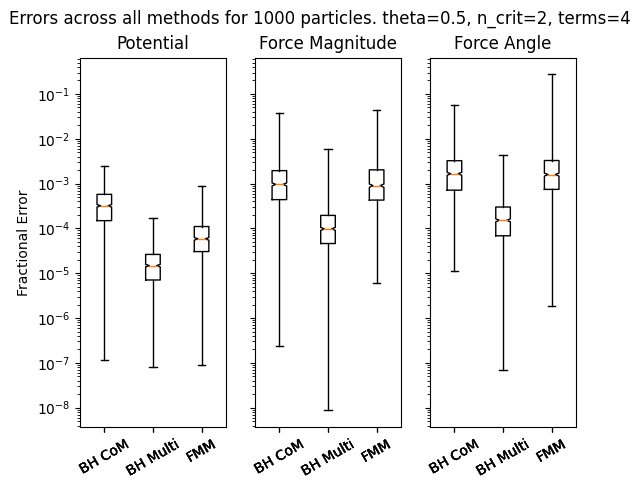

In [2]:
FILE_PATH = 'error_data/general.npz'
fig = plots.general(FILE_PATH)